In [4]:
# import librerie
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time
from timeit import timeit, default_timer

# ESERCIZIO 1 : Chattering fisico

References:
Luca Dieci, Luciano Lopez, "A survey of numerical methods for IVPs of ODEs with discontinuous right-hand side" (https://www.sciencedirect.com/science/article/pii/S0377042712000684)

<br>
Provate a risolvere il seguente problema, esempio di chattering fisico.

E' un esempio di oscillatore smorzato che continua ad oscillare da una parte all'altra della superficie di discontinuità $x_1=0$.
Queste oscillazioni tra le due zone del piano in cui la ODE è continua sono fisiche. Al contrario delle oscillazioni numeriche viste nel notebook precedente, in cui il chattering era un errore numerico.
\begin{cases}
x_1' = -x_1 + x_2\\
x_2' = -\omega^2 x_1 - sign(x_1) 
\end{cases}
con $\omega =10$ e valori iniziale $x_1(0) = 0, x_2(0) = 0.2$

Text(0.5, 1.0, 'Traiettoria del problema dato per esercizio')

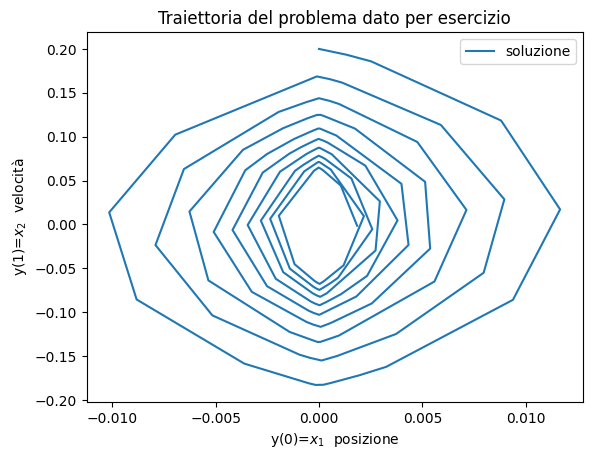

In [5]:
omega = 10 
def f(t,y):
    return np.array([-y[0]+y[1],- omega**2 * y[0] - np.sign(y[0])])

x0 = np.array([0,0.2])
tf = 3
sol = solve_ivp(f, [0, tf], x0, rtol=5e-5,atol=1e-7)

#GRAFICO
plt.plot(sol.y[0,:], sol.y[1,:],'-', label='soluzione')
plt.xlabel('y(0)=$x_1$  posizione'); plt.ylabel('y(1)=$x_2$  velocità')
plt.legend(); plt.title('Traiettoria del problema dato per esercizio')

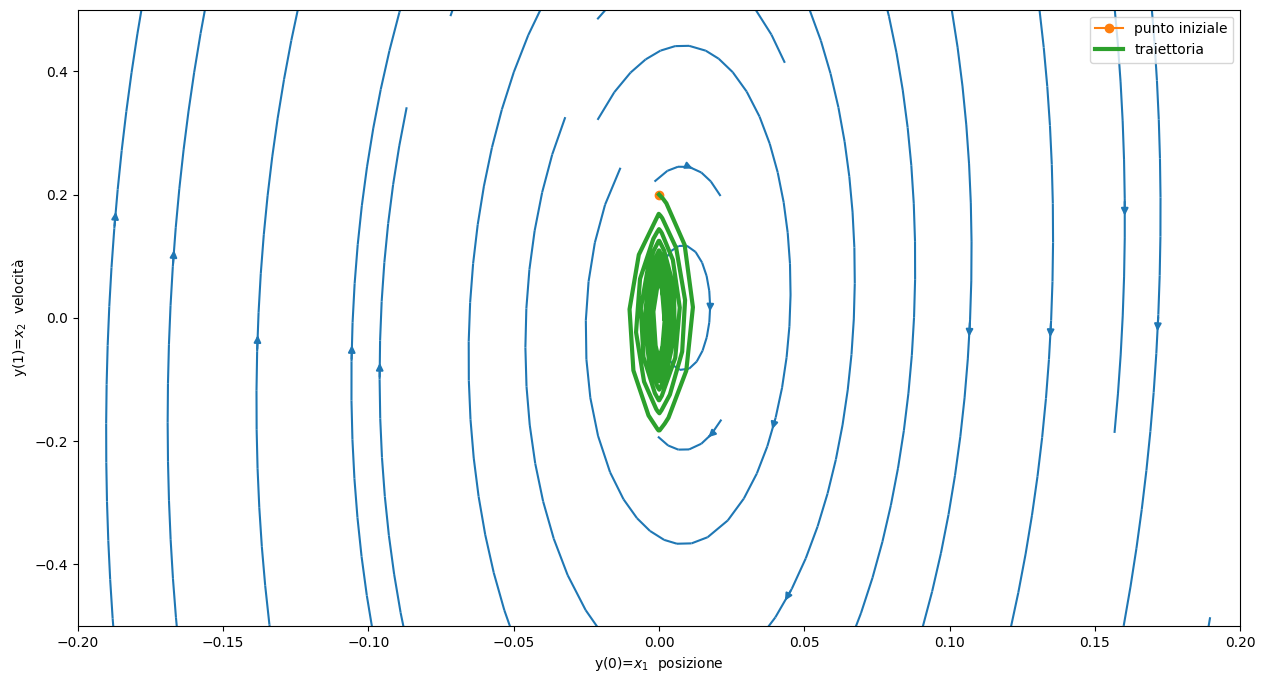

In [7]:
# Traiettoria nello spazio delle fasi
xvalues, yvalues = np.meshgrid(np.arange(-0.4, 0.4, 1e-1), np.arange(-1., 1., 1e-1))

xdot = np.zeros(np.shape(xvalues))
ydot = np.zeros(np.shape(yvalues))

for i in range(0,np.size(xvalues,0)):
    for j in range(0,np.size(xvalues,1)):
        fij = f(0, np.array([xvalues[i,j],yvalues[i,j]]));
        xdot[i,j] = fij[0];
        ydot[i,j] = fij[1];
        
plt.figure(figsize=(15,8))
plt.streamplot(xvalues, yvalues, xdot, ydot);

plt.axis([-0.2,0.2,-0.5,0.5])
plt.plot(sol.y[0,0], sol.y[1,0],'o-',label='punto iniziale'); 
plt.plot(sol.y[0,:], sol.y[1,:],'-',linewidth=3, label='traiettoria'); 
plt.xlabel('y(0)=$x_1$  posizione'); plt.ylabel('y(1)=$x_2$  velocità'); 
plt.legend();